# 1. Mô tả bộ dữ liệu
### Nguồn dữ liệu:
Dataset “Mobile Device Usage and User Behavior Dataset” được chia sẻ trên Kaggle và có thể truy cập qua kagglehub. Dữ liệu mô tả hành vi sử dụng thiết bị di động của người dùng (Android và iOS).
### Mục tiêu bài toán:
Xây dựng mô hình phân loại người dùng theo mức độ sử dụng thiết bị di động (User Behavior Class, từ 1–5).

→ Đây là bài toán phân loại đa lớp (multiclass classification).
### Quy mô dữ liệu:
700 mẫu, 10 cột, không có giá trị thiếu.
### Các thuộc tính chính:
| Thuộc tính                 | Mô tả                                            | Kiểu dữ liệu     |
| -------------------------- | ------------------------------------------------ | ---------------- |
| User ID                    | Mã người dùng                                    | Numeric          |
| Device Model               | Tên thiết bị (Samsung, iPhone, Xiaomi, ...)      | Categorical      |
| Operating System           | Hệ điều hành (Android/iOS)                       | Categorical      |
| App Usage Time (min/day)   | Thời gian sử dụng app trung bình mỗi ngày (phút) | Numeric          |
| Screen On Time (hours/day) | Số giờ trung bình màn hình bật mỗi ngày          | Numeric          |
| Battery Drain (mAh/day)    | Mức tiêu hao pin mỗi ngày (mAh)                  | Numeric          |
| Number of Apps Installed   | Số lượng ứng dụng cài đặt                        | Numeric          |
| Data Usage (MB/day)        | Lượng dữ liệu di động sử dụng mỗi ngày (MB)      | Numeric          |
| Age                        | Tuổi người dùng                                  | Numeric          |
| Gender                     | Giới tính (Male/Female)                          | Categorical      |
| User Behavior Class        | Nhãn hành vi sử dụng (1–5)                       | Numeric (Target) |

### Đặc điểm dữ liệu:

- Không có giá trị thiếu.

- Một số thuộc tính phân loại cần mã hóa (Device Model, Operating System, Gender).

- Biến mục tiêu (User Behavior Class) có 5 lớp gần cân bằng.

- Có nhiều giá trị rời rạc, thang đo khác nhau → cần chuẩn hóa.

### Chất lượng và xử lý dữ liệu:

- Dữ liệu sạch, không cần loại bỏ mẫu.

- Áp dụng Label Encoding cho dữ liệu phân loại.

- Chuẩn hóa dữ liệu số bằng StandardScaler.

### Ứng dụng và phạm vi sử dụng:

- Phân loại người dùng theo hành vi sử dụng để phục vụ:

  - Cá nhân hóa trải nghiệm ứng dụng.

  - Dự đoán nhu cầu nâng cấp gói dịch vụ.

  - Phân tích hành vi khách hàng trong marketing mobile.

- Là bộ dữ liệu huấn luyện lý tưởng cho các mô hình: Random Forest, Gradient Boosting, TabPFN, SVM.

# 2. Quy trình chia dữ liệu và huấn luyện mô hình Naiver Bayes

## 2.1 Tải và đọc dữ liệu

In [1]:
import kagglehub
import pandas as pd
import glob
import os

# Tải dữ liệu từ kagglehub
try:
    path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")
except Exception as e:
    print(f"Lỗi khi tải dữ liệu: {e}")
    exit()

csv_files = glob.glob(os.path.join(path, '*.csv'))

if not csv_files:
    print("Không tìm thấy file CSV nào trong thư mục đã tải.")
    exit()

data_file_path = csv_files[0]
df = pd.read_csv(data_file_path)

print("  PHÂN TÍCH CÁC NHÃN/GIÁ TRỊ ĐỘC NHẤT TRONG DỮ LIỆU  ")

for col in df.columns:
    print(f"\n--- Cột: {col} (Dtype: {df[col].dtype}) ---")

    if df[col].dtype == 'object':
        print("Các nhãn/giá trị độc nhất và tần suất:")
        print(df[col].value_counts(dropna=False).head(10))
        print(f"Tổng số giá trị độc nhất: {df[col].nunique()}")

    elif df[col].dtype == 'int64':
        if df[col].nunique() <= 10:
            print("Các giá trị/nhãn số nguyên và tần suất:")
            print(df[col].value_counts(dropna=False))
        else:
            print(f"Số lượng giá trị độc nhất: {df[col].nunique()}. "
                  f"Giá trị nhỏ nhất: {df[col].min()}, Giá trị lớn nhất: {df[col].max()}.")

    elif df[col].dtype == 'float64':
        print(f"Số lượng giá trị độc nhất: {df[col].nunique()}. "
              f"Giá trị nhỏ nhất: {df[col].min()}, Giá trị lớn nhất: {df[col].max()}.")
        print(f"Tỷ lệ giá trị thiếu (NaN): {df[col].isnull().sum() / len(df) * 100:.2f}%")

print("THÔNG TIN TỔNG QUAN DỮ LIỆU:")
print(df.info())
print("\n5 dòng đầu tiên:")
print(df.head())


Using Colab cache for faster access to the 'mobile-device-usage-and-user-behavior-dataset' dataset.
  PHÂN TÍCH CÁC NHÃN/GIÁ TRỊ ĐỘC NHẤT TRONG DỮ LIỆU  

--- Cột: User ID (Dtype: int64) ---
Số lượng giá trị độc nhất: 700. Giá trị nhỏ nhất: 1, Giá trị lớn nhất: 700.

--- Cột: Device Model (Dtype: object) ---
Các nhãn/giá trị độc nhất và tần suất:
Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64
Tổng số giá trị độc nhất: 5

--- Cột: Operating System (Dtype: object) ---
Các nhãn/giá trị độc nhất và tần suất:
Operating System
Android    554
iOS        146
Name: count, dtype: int64
Tổng số giá trị độc nhất: 2

--- Cột: App Usage Time (min/day) (Dtype: int64) ---
Số lượng giá trị độc nhất: 387. Giá trị nhỏ nhất: 30, Giá trị lớn nhất: 598.

--- Cột: Screen On Time (hours/day) (Dtype: float64) ---
Số lượng giá trị độc nhất: 108. Giá trị nhỏ nhất: 1.0, Giá trị lớn nhất: 12.0.

## 2.2 Kiểm tra thông tin và xử lý dữ liệu

In [2]:
print("Thông tin tổng quan:")
df.info()

print("\nGiá trị thiếu:")
print(df.isnull().sum())

# Loại bỏ cột không cần thiết (User ID)
if 'User ID' in df.columns:
    df = df.drop(columns=['User ID'])

# Mã hóa các cột phân loại (Label Encoding)
from sklearn.preprocessing import LabelEncoder

label_cols = ['Device Model', 'Operating System', 'Gender']
for col in label_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Kiểm tra sau khi mã hóa
print("\nSau khi mã hóa:")
print(df.head())

# Đảm bảo không còn giá trị thiếu
df = df.dropna()


Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB

Giá trị thiếu:
User ID                       0
Device Model          

## 2.3 Chia dữ liệu

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tách X và y
X = df.drop(columns=['User Behavior Class'])
y = df['User Behavior Class']

# Chia tập train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)


Kích thước tập huấn luyện: (490, 9)
Kích thước tập kiểm tra: (210, 9)


## 2.4 Huấn luyện mô hình Naive Bayes

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Khởi tạo mô hình Gaussian Naive Bayes
gnb_model = GaussianNB()

# Huấn luyện
gnb_model.fit(X_train, y_train)

# Dự đoán
y_pred = gnb_model.predict(X_test)

## 2.5 Đánh giá mô hình

Độ chính xác (Accuracy): 1.0

Báo cáo phân loại:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210


Ma trận nhầm lẫn:


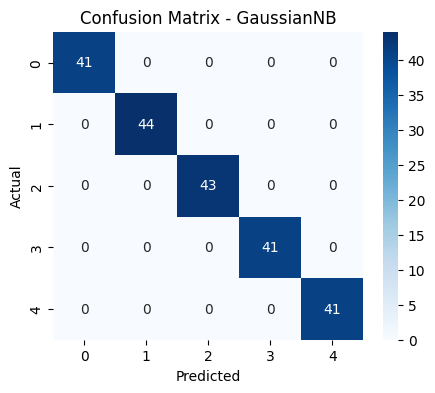

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

print("\nMa trận nhầm lẫn:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
